# 회귀분석_예측 

In [32]:
#데이터 구성: Series,DataFrame
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각
import matplotlib.pyplot as plt
import seaborn as sns

#회귀분석
from statsmodels.formula.api import ols

#qqplot,회귀분석의 상수항 추가 
from statsmodels.api import qqplot, add_constant

#선형 모델 formula 
import statsmodels.formula.api as smf

#평가함수
from statsmodels.tools.eval_measures import rmse 

#jupyter notebook 사용시 그래프 자동 출력 옵션 
%matplotlib inline

#다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#선형회귀모형
from sklearn.linear_model import LinearRegression 

#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler 

#한글깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

In [33]:
# 1. 데이터 구성하기 
df_raw=pd.read_csv("/home/piai/바탕화면/강연주/과제/3/체질검사.csv", engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [34]:
df_raw.describe().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,19.151,44.885,178.924,70.149,37.992,100.824,92.556,99.905,59.406,38.590,23.102,32.273,28.664,18.230
std,8.369,12.602,29.389,3.663,2.431,8.430,10.783,7.164,5.250,2.412,1.695,3.021,2.021,0.934
min,0.000,22.000,118.500,29.500,31.100,79.300,69.400,85.000,47.200,33.000,19.100,24.800,21.000,15.800
25%,12.475,35.750,159.000,68.250,36.400,94.350,84.575,95.500,56.000,36.975,22.000,30.200,27.300,17.600
50%,19.200,43.000,176.500,70.000,38.000,99.650,90.950,99.300,59.000,38.500,22.800,32.050,28.700,18.300
75%,25.300,54.000,197.000,72.250,39.425,105.375,99.325,103.525,62.350,39.925,24.000,34.325,30.000,18.800
max,47.500,81.000,363.150,77.750,51.200,136.200,148.100,147.700,87.300,49.100,33.900,45.000,34.900,21.400


In [35]:
# BMI 지수 추가하기 
df_raw['BMI']=0.45*df_raw['WEIGHT']/(df_raw['HEIGHT']*0.0254)**2
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


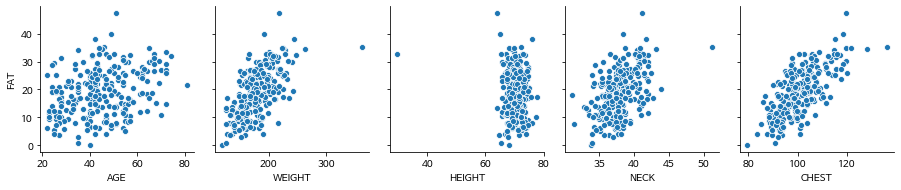

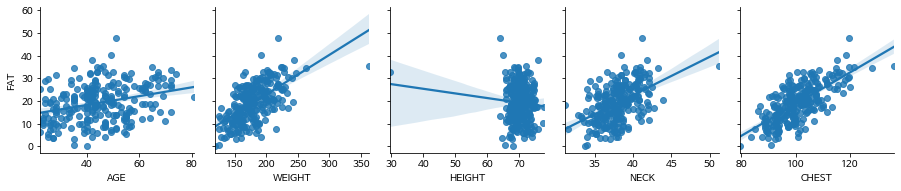

In [36]:
# 2. 변수 간의 경향성 파악 - 그래프 분석

#산점도 행렬: 목표변수와 설명변수 지정 
sns.pairplot(df_raw, y_vars='FAT', 
             x_vars=['AGE','WEIGHT','HEIGHT','NECK','CHEST']) 

#회귀 적합선 추가
sns.pairplot(df_raw, y_vars='FAT', 
             x_vars=['AGE','WEIGHT','HEIGHT','NECK','CHEST'], kind='reg') 

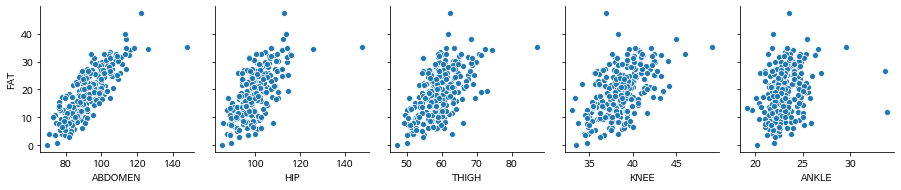

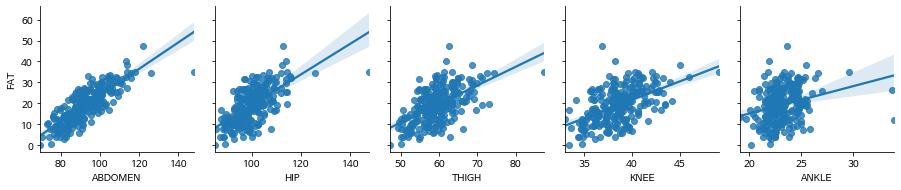

In [37]:
#산점도 행렬: 목표변수와 설명변수 지정 
sns.pairplot(df_raw, y_vars='FAT', 
             x_vars=['ABDOMEN','HIP','THIGH','KNEE','ANKLE']) 

#회귀 적합선 추가
sns.pairplot(df_raw, y_vars='FAT', 
             x_vars=['ABDOMEN','HIP','THIGH','KNEE','ANKLE'], kind='reg') 

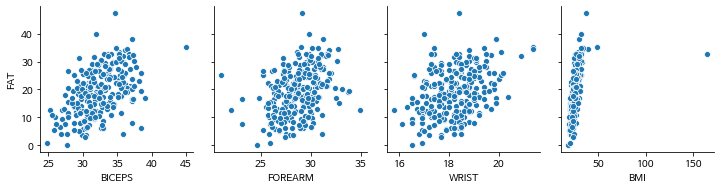

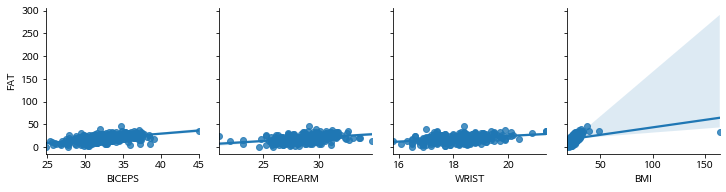

In [38]:
#산점도 행렬: 목표변수와 설명변수 지정 
sns.pairplot(df_raw, y_vars='FAT', 
             x_vars=['BICEPS','FOREARM','WRIST','BMI']) 

#회귀 적합선 추가
sns.pairplot(df_raw, y_vars='FAT', 
             x_vars=['BICEPS','FOREARM','WRIST','BMI'], kind='reg') 

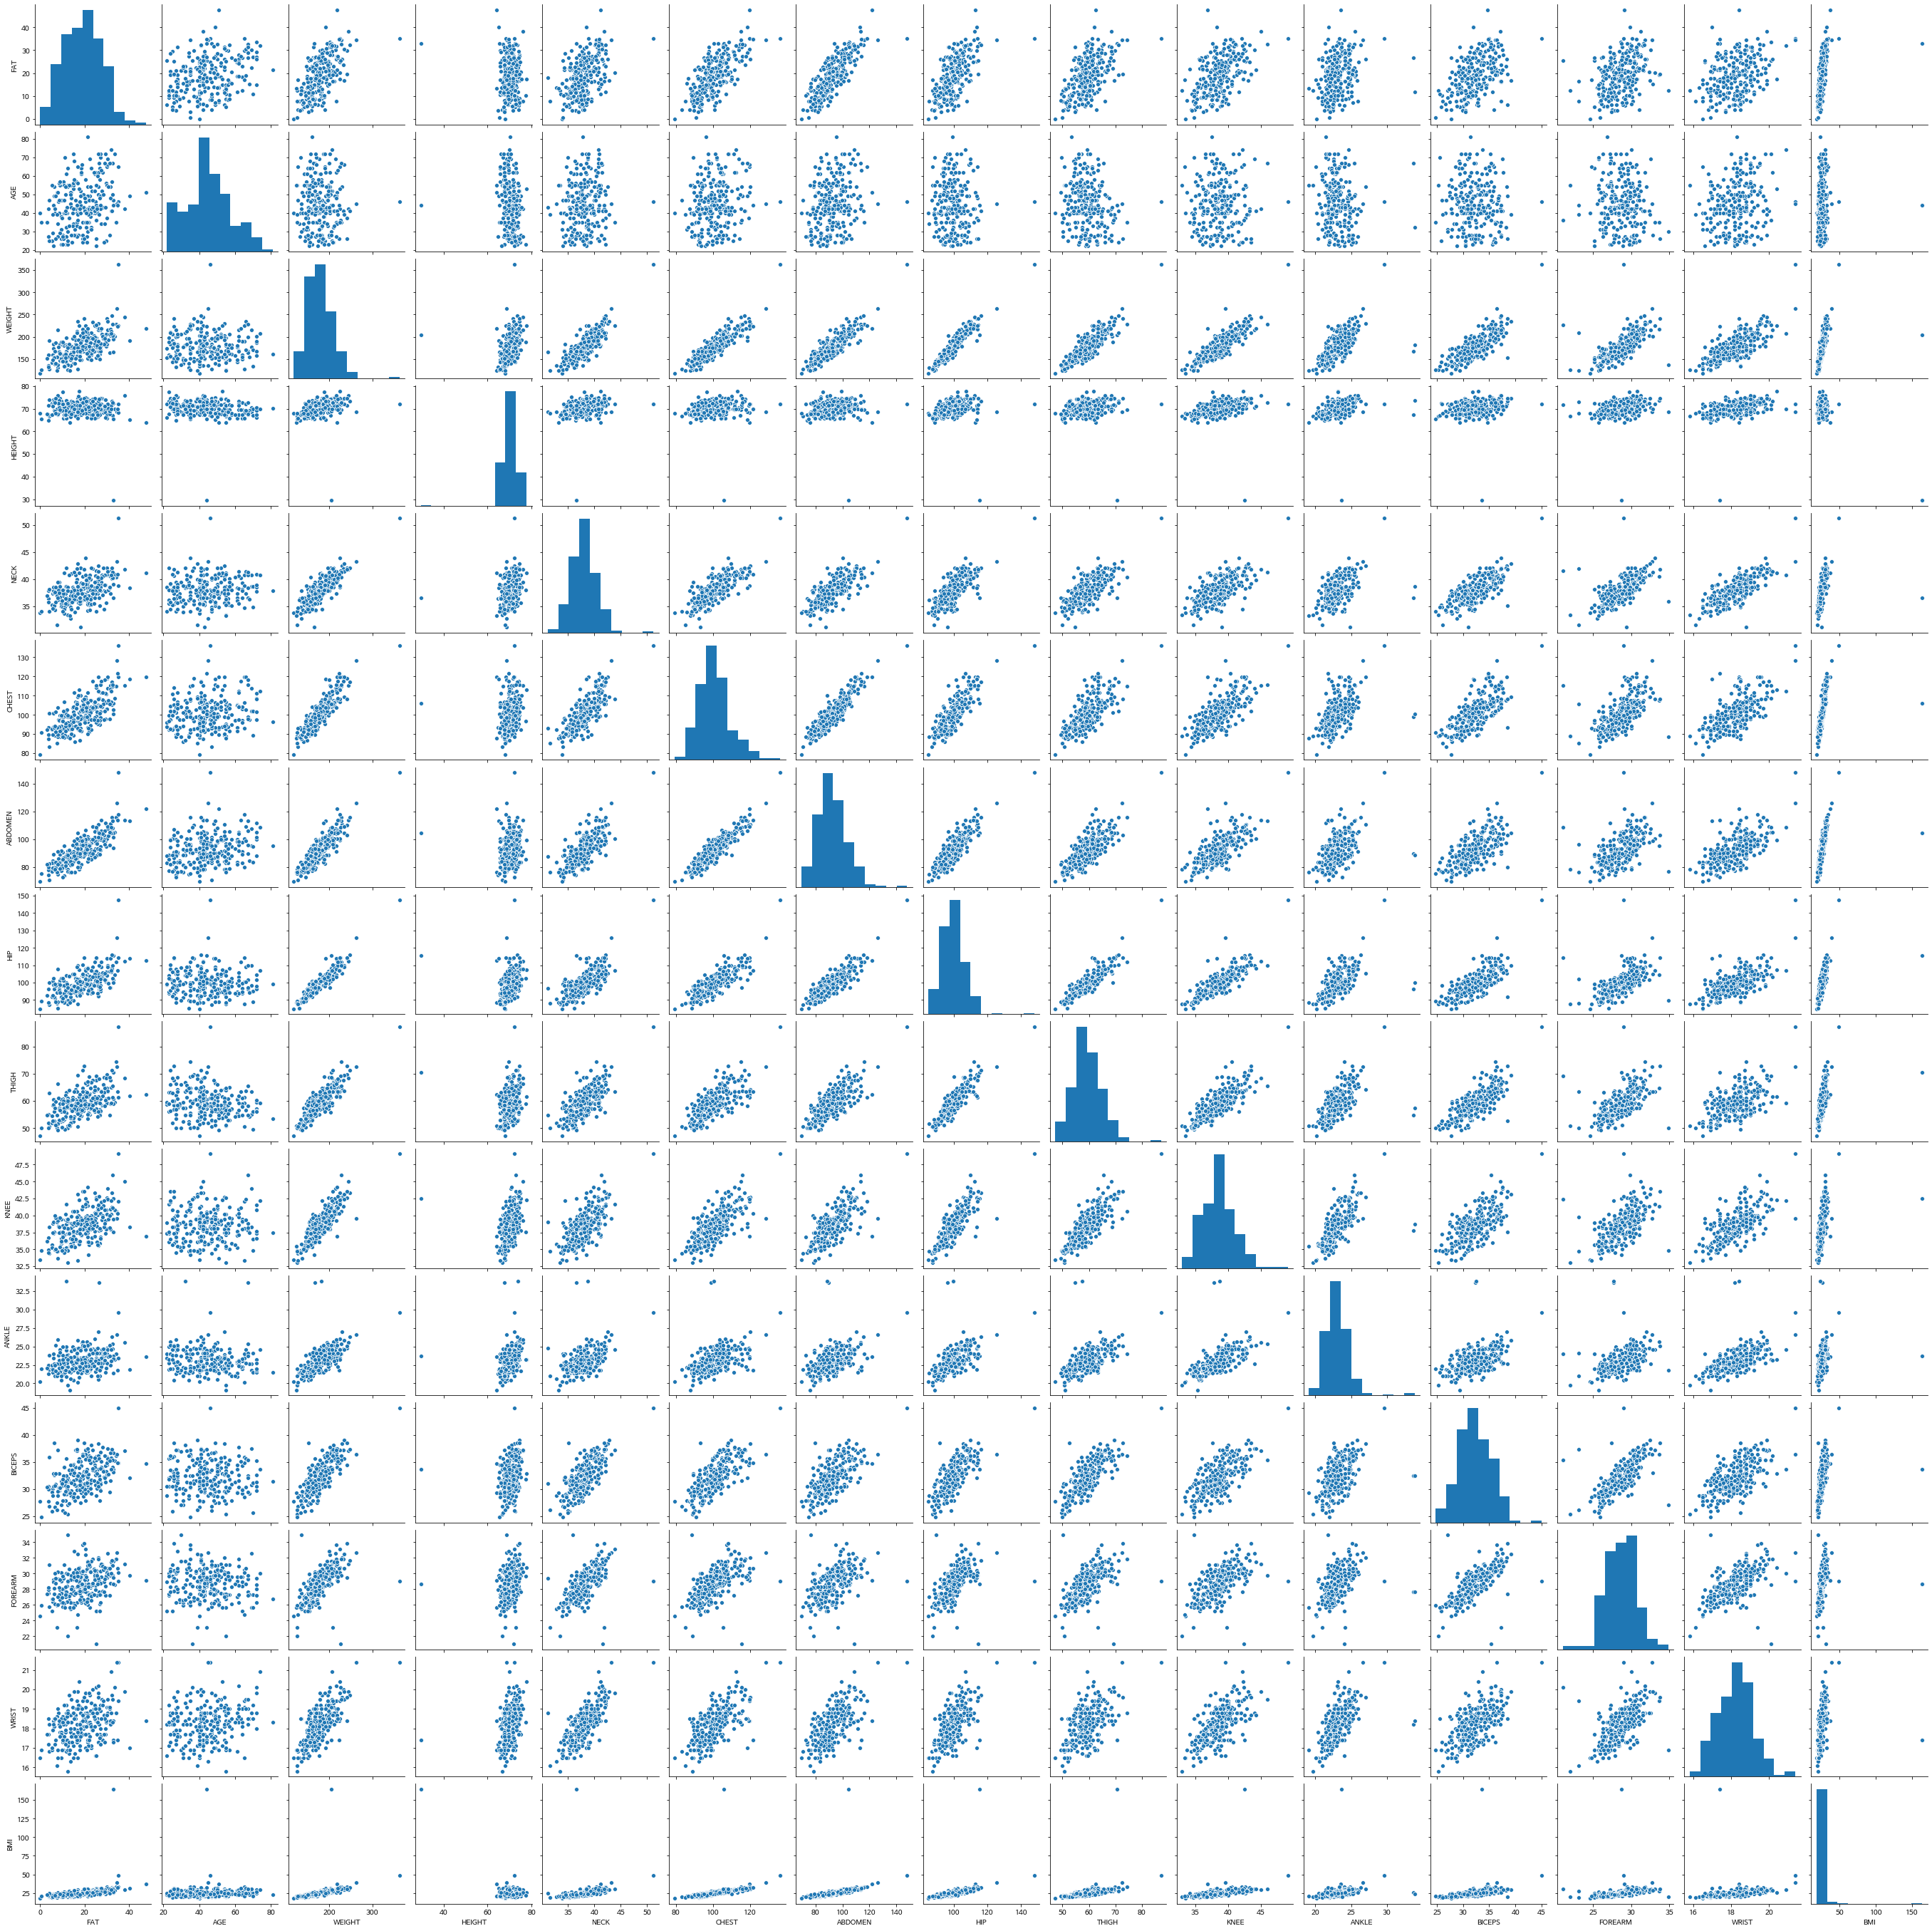

In [39]:
# 산점도 행렬 : 전체 숫자형 변수
sns.pairplot(df_raw)

In [40]:
# 상관관계 분석
df_raw.corr().round(3)
print("체질 비만도와 다른 변수의 산점도 그래프 분석 결과, 무게, 가슴둘레, 복부둘레, 엉덩이 둘레 등이 높은 양의 상관성을 보임을 알 수 있다.")

체질 비만도와 다른 변수의 산점도 그래프 분석 결과, 무게, 가슴둘레, 복부둘레, 엉덩이 둘레 등이 높은 양의 상관성을 보임을 알 수 있다.


In [41]:
df_raw.sort_values(by=['BMI'], ascending=False)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
78,32.9,44,205.00,29.50,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.306562
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
82,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,38.774160
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
117,35.0,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,33.616780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,15.1,34,140.00,70.50,36.0,89.2,83.4,89.6,52.4,35.6,20.4,28.3,26.2,16.5,19.646938
230,10.1,27,146.00,72.25,34.1,88.5,72.8,91.1,53.6,36.8,23.8,27.8,26.3,17.4,19.508426
53,5.3,25,143.75,72.50,35.2,92.3,76.5,92.1,51.9,35.7,22.0,25.8,25.2,16.9,19.075544
174,7.7,39,125.25,68.00,31.5,85.1,76.0,88.2,50.0,34.7,21.0,26.1,23.1,16.1,18.893177


In [42]:
df_raw.sort_values(by=['HEIGHT'], ascending=False)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
118,17.4,53,224.50,77.75,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4,25.903630
238,10.3,23,188.15,77.50,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,21.849721
51,38.1,42,244.25,76.00,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9,29.495276
179,7.8,27,216.00,76.00,39.4,103.6,90.9,107.7,66.2,39.2,25.9,37.2,30.2,19.0,26.083847
152,17.3,43,194.00,75.50,38.5,110.1,88.7,102.1,57.5,40.0,24.8,35.1,30.7,19.2,23.738480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,40.1,49,191.75,65.00,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0,31.655833
49,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2,22.168319
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
89,13.5,55,125.00,64.00,33.2,87.7,76.0,88.6,50.9,35.4,19.1,29.3,25.7,16.9,21.286053


In [43]:
print("BMI지수가 비정상적으로 높은 사람이 있어서 확인해 보았다.78번의 사람이 BMI지수가 164.31로 비정상적으로 높은 값을 가지고 있다. 또한 키의 이상치를 확인하였을 때 78번은 지나치게 낮은 키 값을 가지고 있다. 결과의 정확성을 위해 78번은 분석에서 제외하기로 하였다.")

BMI지수가 비정상적으로 높은 사람이 있어서 확인해 보았다.78번의 사람이 BMI지수가 164.31로 비정상적으로 높은 값을 가지고 있다. 또한 키의 이상치를 확인하였을 때 78번은 지나치게 낮은 키 값을 가지고 있다. 결과의 정확성을 위해 78번은 분석에서 제외하기로 하였다.


# 3 회귀 모델 생성

In [44]:
# 이상치 제거
df_raw_1=df_raw.drop([df_raw.index[78]])
df_raw_1

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.537049
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,26.139558
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,26.060228
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,24.935981


In [45]:
# 선형 회귀 분석 :formula(y~X1+X2+...)이용. 상수항(Intercept)자동 추가. 
reg_model=smf.ols(formula="FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP\
                +THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST",data=df_raw_1)

#적합
reg_result=reg_model.fit()
print(reg_result.summary())
print("분석 자료 수 : 249")
print("잔차 자유도 : 236")
print("모델 자유도 : 12")
print("분산 분석 결과 : Prob (F-statistic)이 0.05보다 작으므로 회귀모델로서 유의하다.")
print("설명력 : 74.4%")
print("나이, 목 둘레, 복부 둘레, 엉덩이 둘레, 팔목 둘레, 손목 둘레의 p값은 0.05보다 작으므로 유의하다.")

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     57.61
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.07e-63
Time:                        02:26:33   Log-Likelihood:                -717.09
No. Observations:                 251   AIC:                             1460.
Df Residuals:                     238   BIC:                             1506.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3921      8.737      1.189      0.2

In [46]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가 
df_raw_x=df_raw_1.drop("FAT", axis=1)

# statsmodels의 상수항 추가 함수 적용 
df_raw_x_const=add_constant(df_raw_x)

# DataFrame으로 저장 
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)\
             for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)
print("VIF가 10보다 큰 column은 다중공선성이 있으므로 제거한다.")

VIF가 10보다 큰 column은 다중공선성이 있으므로 제거한다.


In [47]:
# 다중공선성 높은 변수 제거 후 공선성 재확인 
df_raw_x=df_raw_1.drop(["HEIGHT","BMI","WEIGHT","FAT"], axis=1)

# statsmodels의 상수항 추가 함수 적용 
df_raw_x_const=add_constant(df_raw_x)

# DataFrame으로 저장 
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)\
             for i in range(df_raw_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
8,ANKLE,1.842
1,AGE,2.046
10,FOREARM,2.194
11,WRIST,3.226
9,BICEPS,3.505
2,NECK,3.928
7,KNEE,4.034
6,THIGH,7.359
3,CHEST,7.861
5,HIP,10.491


In [48]:
print("다중 공선성 문제가 해결되었다.")

다중 공선성 문제가 해결되었다.


In [49]:
# 선형 분석 회귀
reg_model=smf.ols(formula="FAT~ANKLE+AGE+FOREARM+WRIST+KNEE+\
                    BICEPS+NECK+CHEST+THIGH+HIP+ABDOMEN",data=df_raw_1)

# 적합 
reg_result=reg_model.fit()
print(reg_result.summary())

print("분석 자료 수 : 249")
print("잔차 자유도 : 237")
print("모델 자유도 : 11")
print("분산 분석 결과 : Prob (F-statistic)이 0.05보다 작으므로 회귀모델로서 유의하다.")
print("설명력 : 74.2%")
print("나이, 팔둘레, 목둘레, 손목 둘레, 엉덩이 둘레, 복부 둘레의 p값은 0.05보다 작으므로 유의하다.")

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     62.26
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.41e-64
Time:                        02:26:43   Log-Likelihood:                -718.36
No. Observations:                 251   AIC:                             1461.
Df Residuals:                     239   BIC:                             1503.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9021      6.848      0.278      0.7

# 4. 후진제거법을 이용한 변수 선택

In [50]:
# RFE함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거 

# 목표 변수 분리
df_raw_y=df_raw_1['FAT']

# sklearn의 선형회귀 모델 
model=LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_raw_x,df_raw_y)

#선택된 변수 
selected_cols=df_raw_x.columns[rfe.support_]
removed_cols=df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))
print("후진제거법 결과, 체질 비만도, 목 둘레, 복부 둘레, 엉덩이둘레, 팔목 둘레, 팔 둘레 변수를 선택하였다.")

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')
후진제거법 결과, 체질 비만도, 목 둘레, 복부 둘레, 엉덩이둘레, 팔목 둘레, 팔 둘레 변수를 선택하였다.


In [51]:
# 회귀 모델 생성 
rfe_reg_model=smf.ols(formula="FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST",data=df_raw_1)

# 적합 
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())
print("분석 자료 수 : 249")
print("잔차 자유도 : 244")
print("모델 자유도 : 4")
print("분산 분석 결과 : Prob (F-statistic)이 0.05보다 작으므로 회귀모델로서 유의하다.")
print("설명력 : 73.2%")
print("최종 모델 회귀식 : [FAT]=2.6380-0.5684[NECK]+0.9749[ABDOMEN]-0.3480[HIP]+0.4261[FOREARM]-1.6239[WRIST]")

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     132.5
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.45e-67
Time:                        02:26:49   Log-Likelihood:                -723.73
No. Observations:                 251   AIC:                             1459.
Df Residuals:                     245   BIC:                             1481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5851      6.224      0.415      0.6

# 5. 결론 도출

손목의 두께가 얇을 수록 복부 둘레가 커질수록 체질 비만도가 높다. 


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


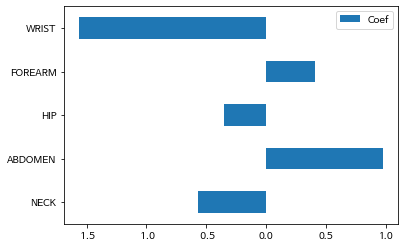

In [52]:
#회귀 계수의 정규화 비교 (비표준화 회귀계수 기준)
df_reg_coef=pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},\
                         index = selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=True) 
print("손목의 두께가 얇을 수록 복부 둘레가 커질수록 체질 비만도가 높다. ")

In [53]:
# 설명변수 표준화 적용->표준화 회귀계수 산출 목적
scaler=StandardScaler()

# Scale 변환대상 변수:일반적으로 설명변수
cols=df_raw_x.columns

# Scale 변환
np_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)

# 목표변수 추가
df_scaled['FAT']=df_raw_1['FAT']
reg_model_scaled=smf.ols(formula='FAT ~ NECK+ABDOMEN+HIP+FOREARM+WRIST',data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     6.010
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.89e-05
Time:                        02:26:54   Log-Likelihood:                -870.47
No. Observations:                 250   AIC:                             1753.
Df Residuals:                     244   BIC:                             1774.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0895      0.504     37.893      0.0

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


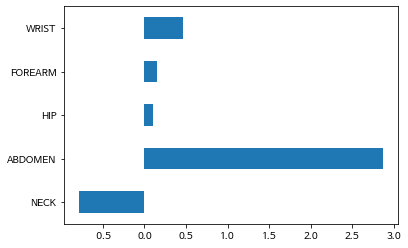

In [54]:
df_reg_coef=pd.DataFrame({'Coef':reg_result_scaled.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y='Coef',legend=False)

In [55]:
print("이전화 비교하였을 때 회귀 계수의 방향은 동일하지만 중요도가 달라졌다. 정규화 하였을 때는 허리 둘레가 가장 중요한 계수가 되었다.")

이전화 비교하였을 때 회귀 계수의 방향은 동일하지만 중요도가 달라졌다. 정규화 하였을 때는 허리 둘레가 가장 중요한 계수가 되었다.


# 의사결정나무

# 0. 패키지 불러오기

In [4]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz:나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 최적 모델,파라미터 탐색
from sklearn.model_selection import GridSearchCV

# os 환경
import os
# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터 구성하기 

In [5]:
#데이터 구성하기 
df_raw=pd.read_csv("/home/piai/바탕화면/강연주/과제/3/Concrete.csv", engine='python')

#목표변수, 설명변수 데이터 지정 
df_raw_y=df_raw['CONCRETE_COMPRESSIVE_STRENGTH']
df_raw_x=df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1, inplace=False)

In [6]:
# train, test 데이터를 7:3 비율로 분할한다. 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [7]:
# train, validation 데이터를 4:3 비율로 분할한다. 
df_train2_x,df_validation_x,df_train2_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train2_x.shape))
print("train data Y size : {}".format(df_train2_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data Y size : (309,)


# 2. 모델 생성 

In [8]:
# 0. 모델 생성 
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

# Train 데이터 설명력 
print("Score in training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Score in test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))
tree_uncustomized 

Score in training set:0.997
Score in test set:0.825


DecisionTreeRegressor(random_state=1234)

In [9]:
print("모델 설명력은 train=99.7%, test=82.5%로 모델은 train데이터에 overfitting되어 있다.")

모델 설명력은 train=99.7%, test=82.5%로 모델은 train데이터에 overfitting되어 있다.


In [10]:
# 1-1 모델 Parameter 조정 : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# min_samples_leaf:잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.997,0.825
1,2,0.978,0.830
2,3,0.959,0.811
3,4,0.938,0.807
4,5,0.922,0.797
5,6,0.911,0.797
6,7,0.898,0.810
7,8,0.889,0.791
8,9,0.882,0.797
9,10,0.868,0.791


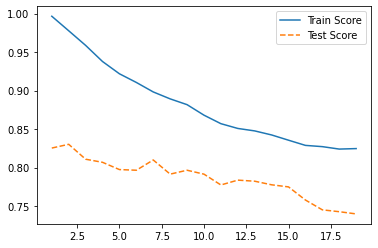

In [11]:
# 모델 설명력 그래프 
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.legend()

In [12]:
print("잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력을 감소하고, train과 test의 성능을 고려하여 7로 정하였다.")

잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력을 감소하고, train과 test의 성능을 고려하여 7로 정하였다.


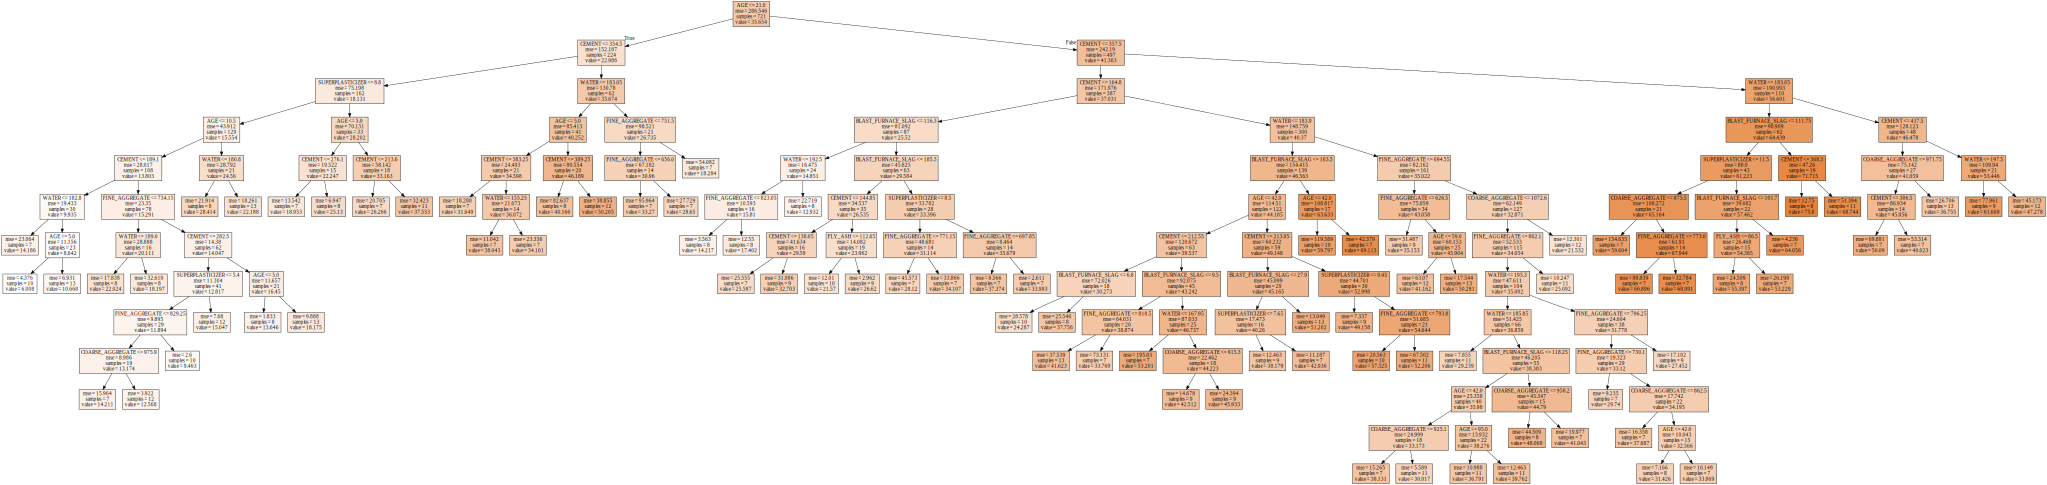

In [13]:
# 변수명 저장
v_feature_name=df_train_x.columns

# 노드의 최소 자료 수=7 모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=7)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_leaf.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)
with open('tree_leaf.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [14]:
# 1-2 모델 Parameter 조정 : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# min_samples_split:분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=7,\
                               min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesLeaf']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.898,0.810
1,6,0.898,0.810
2,8,0.898,0.810
3,10,0.898,0.810
4,12,0.898,0.810
5,14,0.898,0.810
6,16,0.893,0.800
7,18,0.890,0.794
8,20,0.880,0.790
9,22,0.863,0.793


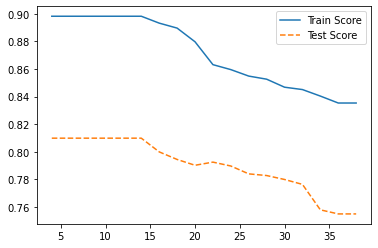

In [15]:
# 모델 설명력 그래프 확인 
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='--',label='Test Score')
plt.legend()

In [61]:
print("분리 노드 최소 자료 수 증가에 따라 모델의 설명력을 감소하고, train과 test의 성능을 고려하여 22로 정하였다.")

분리 노드 최소 자료 수 증가에 따라 모델의 설명력을 감소하고, train과 test의 성능을 고려하여 22로 정하였다.


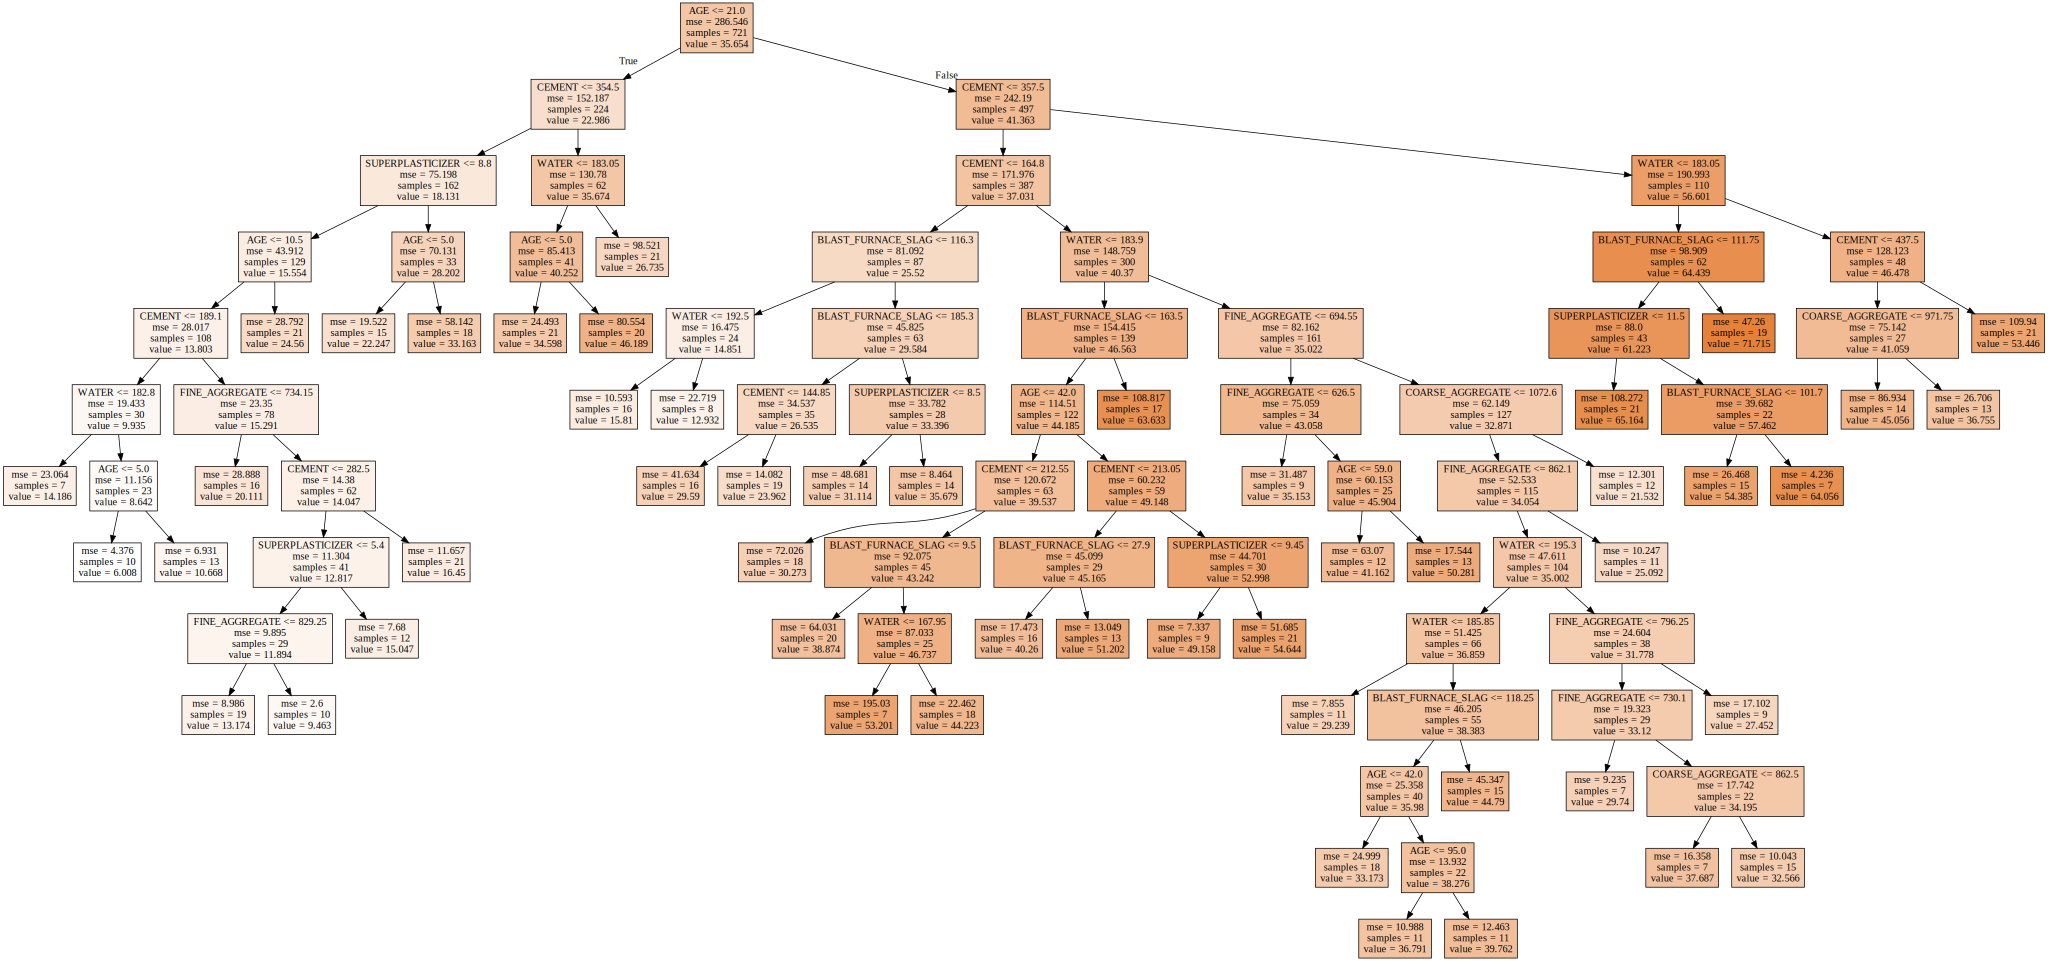

In [17]:
# 분리 노드의 최소 자료 수 22 vs 36 모델과의 비교 
# 분리 노드의 최소 자료 수 22모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=7,min_samples_split=22)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_split.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)
with open('tree_split.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

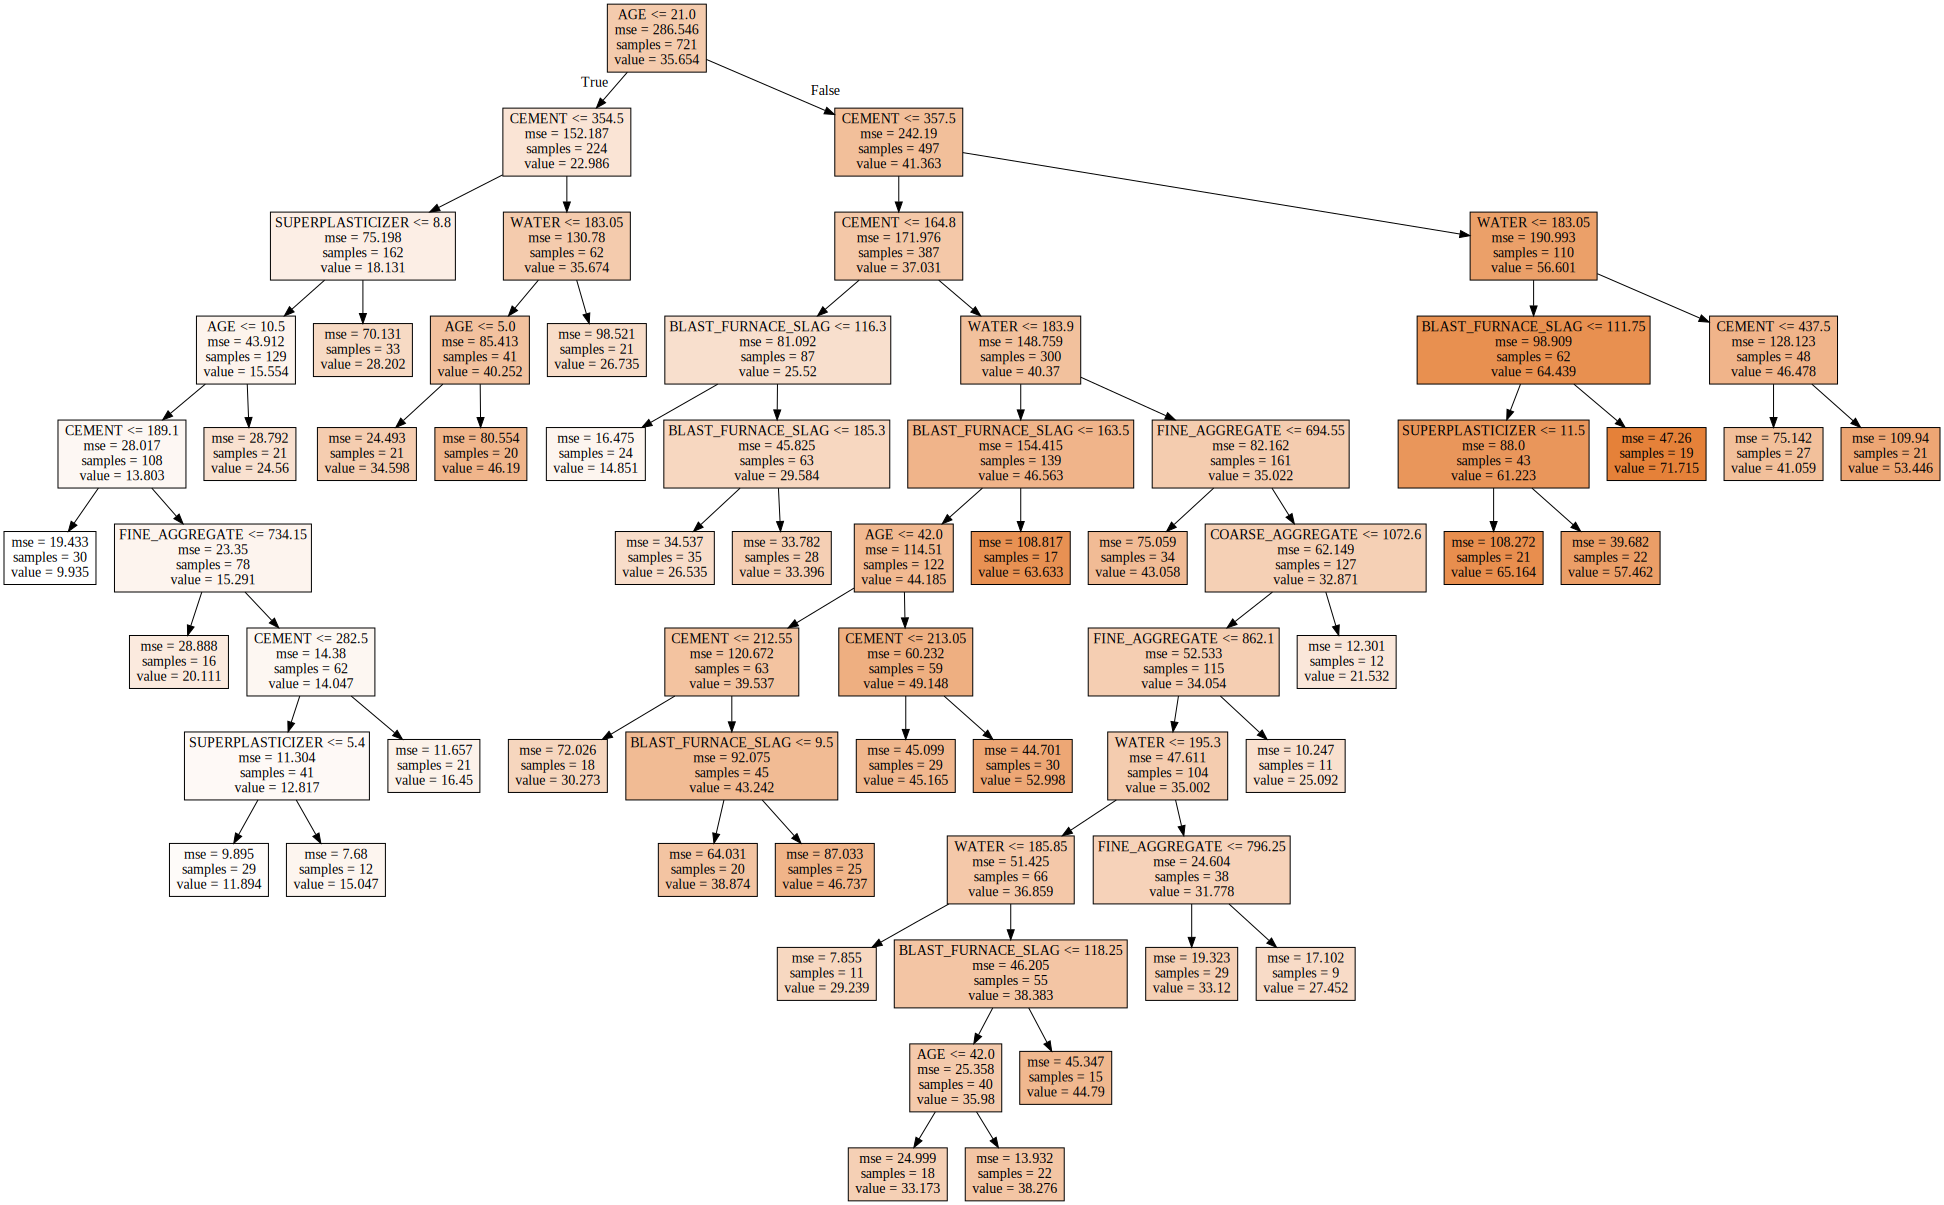

In [18]:
# 분리 노드의 최소 자료 수 36모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=7,min_samples_split=36)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_split.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)
with open('tree_split.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [19]:
# 1-3 모델 Parameter 조정 : 최대 깊이 변경에 따른 모델 성능

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=7,\
                               min_samples_split=22,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesLeaf']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.252,0.235
1,2,0.478,0.495
2,3,0.625,0.597
3,4,0.728,0.677
4,5,0.781,0.725
5,6,0.814,0.742
6,7,0.837,0.763
7,8,0.849,0.784
8,9,0.856,0.783
9,10,0.861,0.789


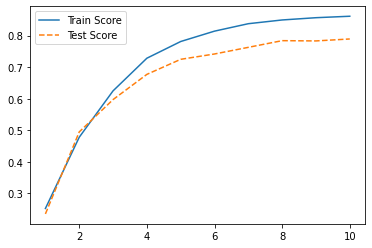

In [20]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.legend()

In [60]:
print("최대 깊이 증가에 따라 모델의 설명력이 증가하고, train과 test의 성능을 고려하여 7로 정하였다.")

최대 깊이 증가에 따라 모델의 설명력이 증가하고, train과 test의 성능을 고려하여 7로 정하였다.


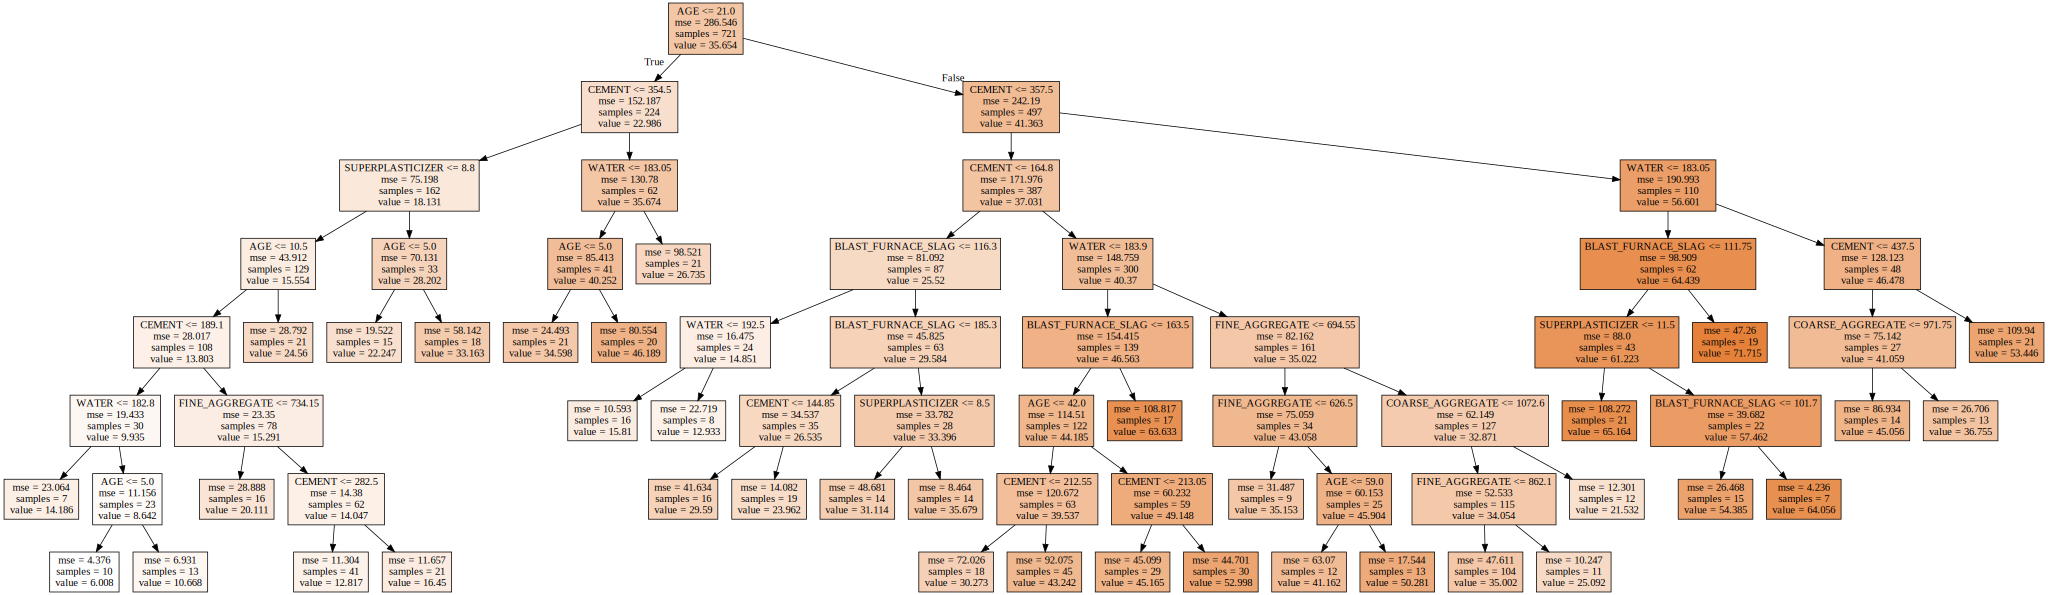

In [22]:
# 최대 깊이=7 모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=7,min_samples_split=22,max_depth=7)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)
with open('tree_depth.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [23]:
# 1-4 GridSearchCV를 이용한 최적 parameter 찾기

#모듈 추가  
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [24]:
estimator=DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid={'criterion':['mse','friedman_mse','mae'],\
           'max_features':['auto','sqrt','log2'],\
           'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
grid_dt.fit(df_validation_x,df_validation_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6)

best parameter:
{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6}

best score:
0.738


In [25]:
print("max_depth가 8일 때 min_sample_leaf가 2, min_sample_split이 6일 때 설명력이 73.8%이다.")

max_depth가 8일 때 min_sample_leaf가 2, min_sample_split이 6일 때 설명력이 73.8%이다.


# 3. 최종 모델 선정

In [28]:
tree_final=DecisionTreeRegressor(min_samples_leaf=2,min_samples_split=6,\
                                max_depth=8,random_state=1234)
tree_final.fit(df_test_x,df_test_y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                      random_state=1234)

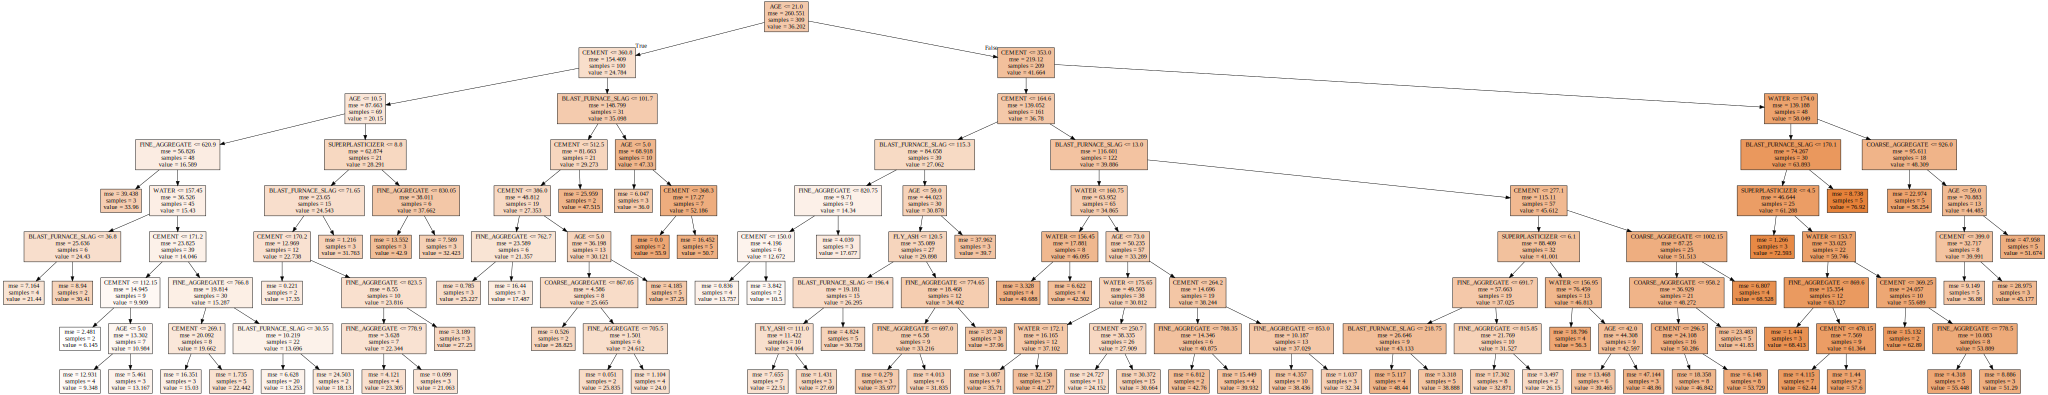

In [29]:
export_graphviz(tree_final,out_file='tree_final.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_final.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 4. 결론 도출

In [30]:
# 1. 설명변수의 중요도 
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.393
7,AGE,0.310
1,BLAST_FURNACE_SLAG,0.121
3,WATER,0.080
6,FINE_AGGREGATE,0.034
5,COARSE_AGGREGATE,0.031
4,SUPERPLASTICIZER,0.025
2,FLY_ASH,0.006


Text(0, 0.5, '변수')

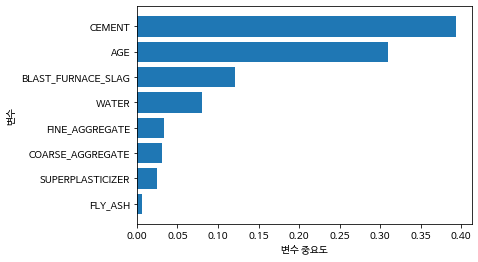

In [33]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [34]:
print("중요변수는 Cement,Age,Blast_Furnace_Slag 순이다. ")

중요변수는 Cement,Age,Blast_Furnace_Slag 순이다. 


# 랜덤 포레스트 

In [2]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz:나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz:나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 예측/회귀 Random FOrest
from sklearn.ensemble import RandomForestRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 1. 데이터 불러오기 

In [3]:
#데이터 구성하기 
df_raw=pd.read_csv("/home/piai/바탕화면/강연주/과제/3/Concrete.csv", engine='python')

#목표변수, 설명변수 데이터 지정 
df_raw_y=df_raw['CONCRETE_COMPRESSIVE_STRENGTH']
df_raw_x=df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1, inplace
                     =False)

In [4]:
# train, test 데이터를 7:3 비율로 분할한다. 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [5]:
# train, validation 데이터를 4:3 비율로 분할한다. 
df_train2_x,df_validation_x,df_train2_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train2_x.shape))
print("train data Y size : {}".format(df_train2_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
validation data X size : (309, 8)
validation data Y size : (309,)


# 2. 모델 생성

In [6]:
rf_uncustomized=RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.983
Score on test set:0.909


In [7]:
print("모델 설명력은 train=98.3%, test=90.9%로 모델은 train데이터에 overfitting되어 있다.")

모델 설명력은 train=98.3%, test=90.9%로 모델은 train데이터에 overfitting되어 있다.


In [8]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

In [9]:
# 1. 트리 수 변경에 따른 모델 성능 

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(random_state=1234,n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_n=pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.975,0.890
1,20,0.979,0.898
2,30,0.981,0.905
3,40,0.982,0.904
4,50,0.983,0.908
5,60,0.983,0.909
6,70,0.983,0.909
7,80,0.983,0.907
8,90,0.983,0.908
9,100,0.983,0.909


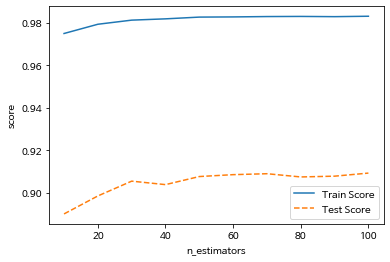

In [10]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [11]:
print("트리 수가 30개를 초과해도 설명력은 거의 향상되지 않으므로 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100을 선택한다.")

트리 수가 30개를 초과해도 설명력은 거의 향상되지 않으므로 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100을 선택한다.


In [12]:
# 2. 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능 

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# min_samples_leaf:잎사귀 최소 자료 수
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.983,0.909
1,2,0.971,0.907
2,3,0.959,0.901
3,4,0.947,0.894
4,5,0.935,0.885
5,6,0.926,0.878
6,7,0.917,0.872
7,8,0.909,0.865
8,9,0.901,0.860
9,10,0.895,0.854


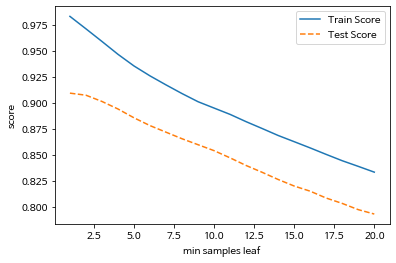

In [13]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

In [52]:
print("잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 test데이터의 정확도 변화를 고려하여 9를 선택한다.")

잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 test데이터의 정확도 변화를 고려하여 9를 선택한다.


In [14]:
# 3. 분리 노드의 최소 자료수 변경에 따른 모델 성능  

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]
# min_samples_split:분리 노드의 최소 자료 수
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                               min_samples_leaf=9,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.901,0.860
1,6,0.901,0.860
2,8,0.901,0.860
3,10,0.901,0.860
4,12,0.901,0.860
5,14,0.901,0.860
6,16,0.901,0.860
7,18,0.901,0.860
8,20,0.898,0.857
9,22,0.895,0.853


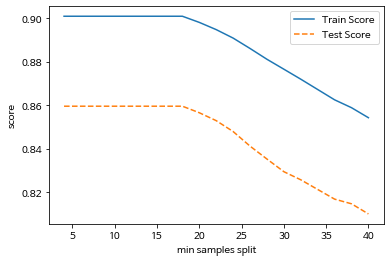

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [16]:
print("분리 노드 최소 자료 수 증가에 따라 모델의 설명력을 감소하고, train과 test의 성능을 고려하여 18로 정하였다.")

분리 노드 최소 자료 수 증가에 따라 모델의 설명력을 감소하고, train과 test의 성능을 고려하여 18로 정하였다.


In [17]:
# 4. 최대 깊이 변경에 따른 모델 성능 

# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                               min_samples_leaf=9,min_samples_split=18,\
                               max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.347,0.342
1,2,0.616,0.605
2,3,0.738,0.713
3,4,0.817,0.782
4,5,0.866,0.833
5,6,0.887,0.850
6,7,0.896,0.856
7,8,0.900,0.859
8,9,0.901,0.859
9,10,0.901,0.860


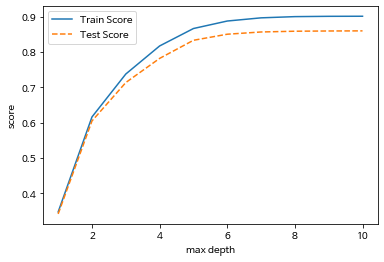

In [18]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

In [19]:
print("최대 깊이 증가에 따라 모델의 설명력이 증가하고, train과 test의 성능을 고려하여 7로 정하였다.")

최대 깊이 증가에 따라 모델의 설명력이 증가하고, train과 test의 성능을 고려하여 7로 정하였다.


# 3. 결론 도출

In [22]:
# 1. 최종 모델 시각화 
rf_final=RandomForestRegressor(min_samples_leaf=1,min_samples_split=18,\
                                max_depth=7,random_state=1234,n_estimators=100)
rf_final.fit(df_train_x,df_train_y)
# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))

Score on training set:0.869
Score on test set:0.869


In [23]:
rf_final

RandomForestRegressor(max_depth=7, min_samples_split=18, random_state=1234)

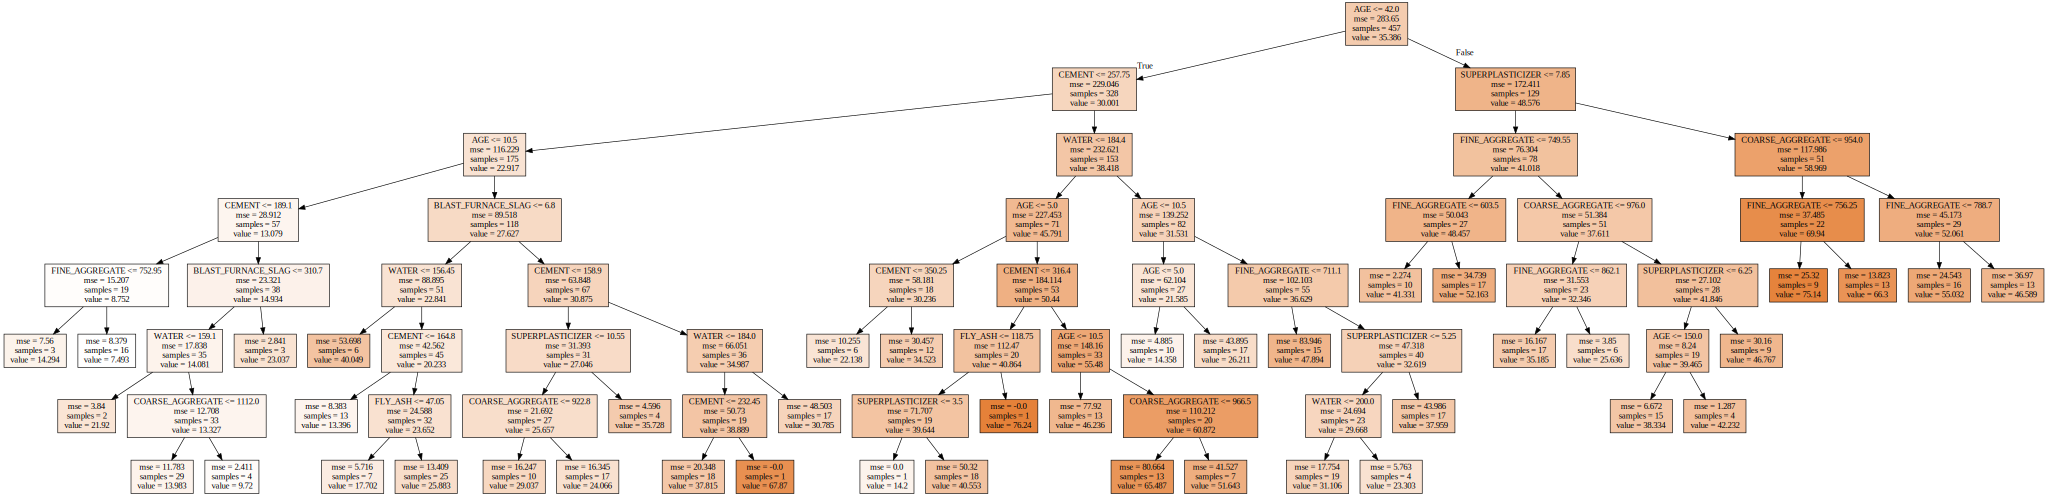

In [24]:
# 변수명 저장
v_feature_name=df_test_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

# tree_final_0.dot 그리기
with open('rfr_final_0.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

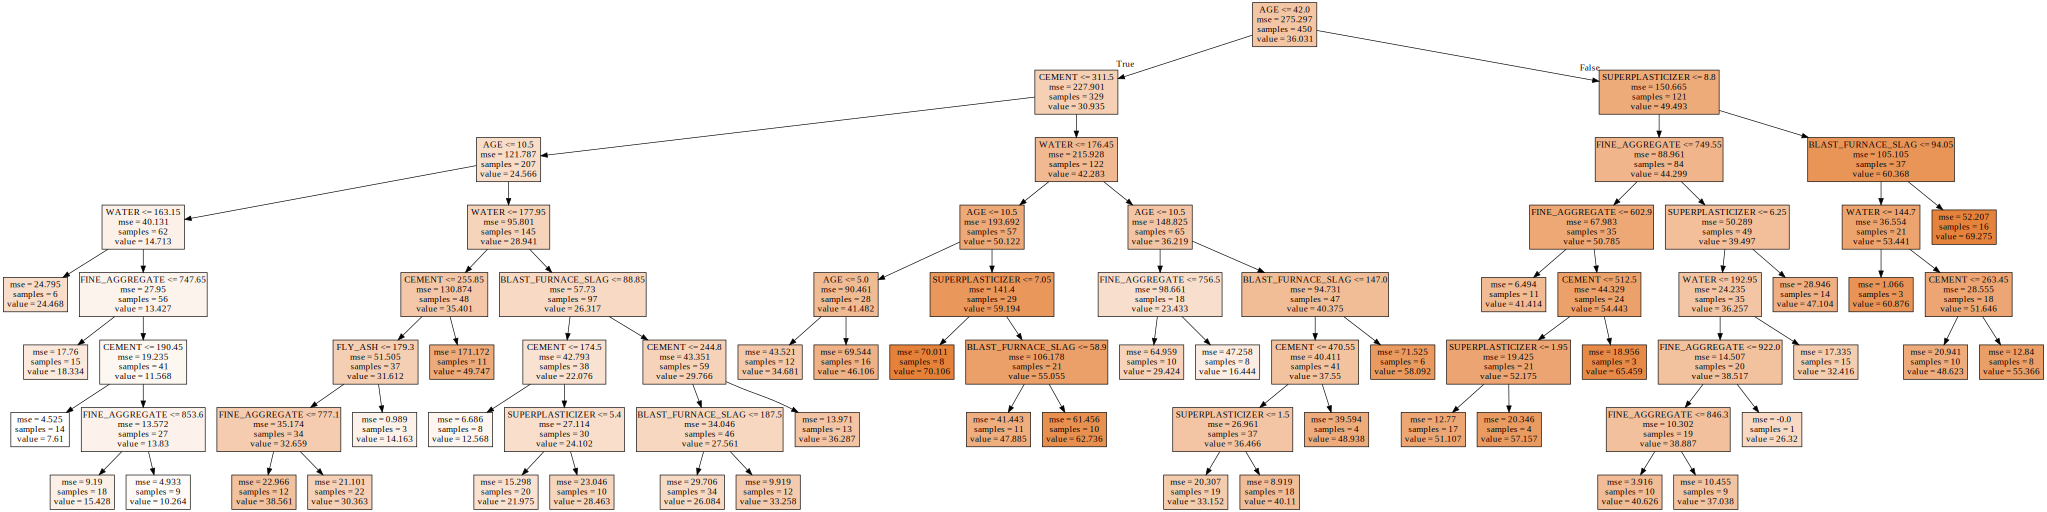

In [25]:
# 1번 트리
export_graphviz(rf_final.estimators_[1],out_file='rfr_final_1.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

# tree_final_1.dot 그리기
with open('rfr_final_1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

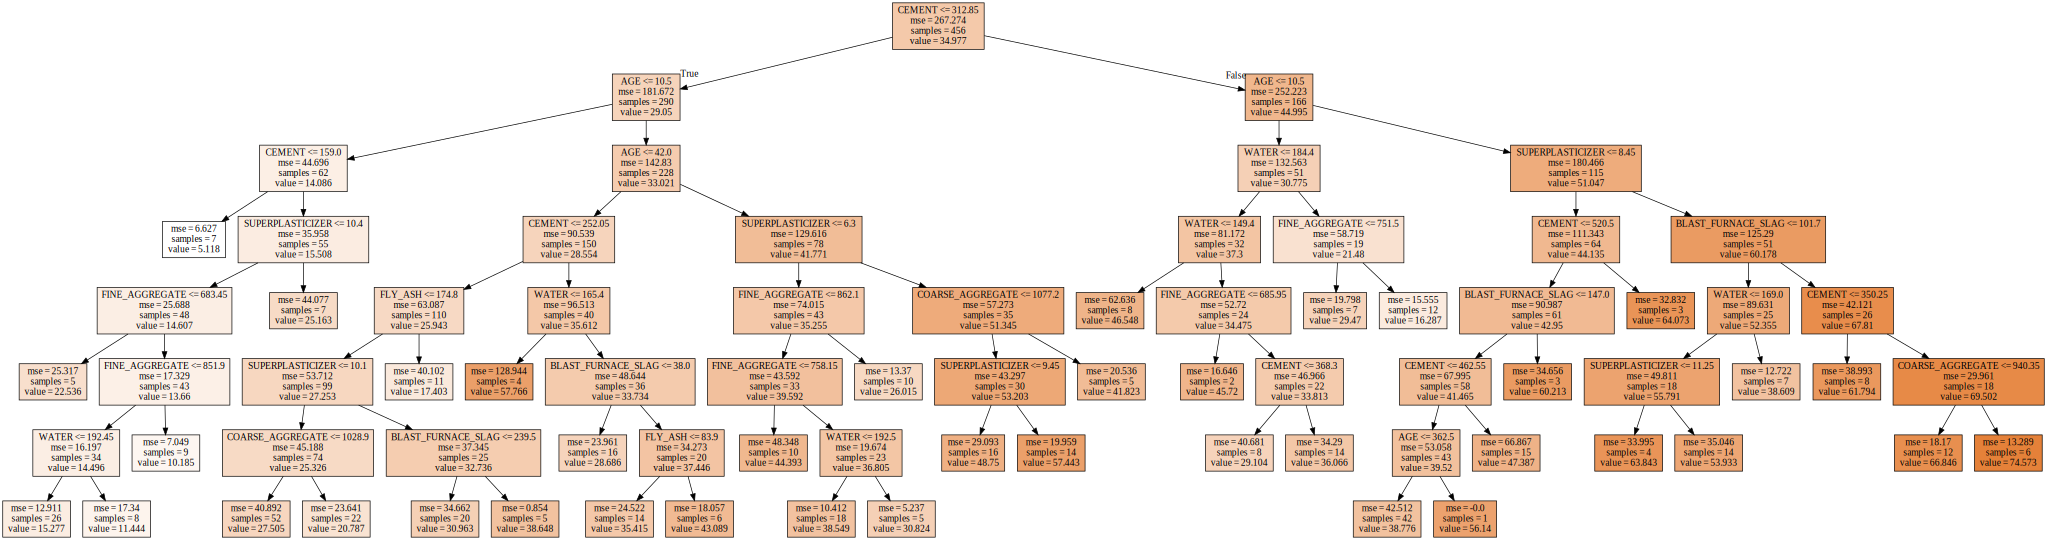

In [26]:
# 10번 트리
export_graphviz(rf_final.estimators_[10],out_file='rfr_final_10.dot',\
               feature_names=v_feature_name,impurity=True,filled=True)

# tree_final_10.dot 그리기
with open('rfr_final_10.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [27]:
# 2. 설명 변수의 중요도 
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.377
0,CEMENT,0.305
3,WATER,0.107
4,SUPERPLASTICIZER,0.087
1,BLAST_FURNACE_SLAG,0.059
6,FINE_AGGREGATE,0.032
5,COARSE_AGGREGATE,0.023
2,FLY_ASH,0.012


Text(0, 0.5, '변수')

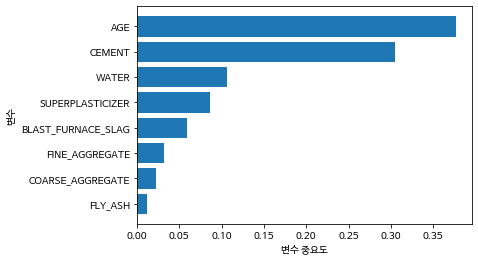

In [28]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [30]:
print("중요변수는 Age,Cement,Water 순이다. ")

중요변수는 Age,Cement,Water 순이다. 
